<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_2023_share/blob/main/week16_timeseries_analysis/ch16_11_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch 16_11 Prophet

이번 챕터에서는 메타에서 공개한 가장 핫한 시계열 예측 라이브러리 prophet의 사용법을 익혀보겠습니다.


prophet은 시계열 예측 모델을 만드는데 필요한 작업들을 상당 부분 자동으로 처리해주고, 분석 하기 편한 시각화 자료들을 제공해주기 때문에 활용도가 높습니다.

In [1]:
import pandas as pd
from prophet import Prophet

## Prophet 기본 사용법

### 데이터 셋 준비

Prophet은 시간을 나타내는 컬럼은 ds, 값을 나타내는 컬럼은 y라는 이름으로 지정해주어야 합니다.

In [10]:
df = pd.read_csv("./drive/MyDrive/dscamp_2023/AirPassengers.csv", parse_dates=["Month"])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})

### 모델 생성 및 학습

In [49]:
model = Prophet()

In [50]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/u5g9n187.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/4jotcbbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69775', 'data', 'file=/tmp/tmpxj7s39dg/u5g9n187.json', 'init=/tmp/tmpxj7s39dg/4jotcbbc.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_modelxdf4zkdc/prophet_model-20230802141818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 인퍼런스

미리 예측을 하고자 하는 날짜 범위를 데이터 프레임 형태로 지정해주고, 예측값을 내립니다.

In [39]:
# placeholder 만들어주기
future = model.make_future_dataframe(periods=24, freq="MS")

In [40]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
163,1962-08-01
164,1962-09-01
165,1962-10-01
166,1962-11-01


In [41]:
forecast = model.predict(future)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.398252,57.140045,115.354204,107.398252,107.398252,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,0.0,0.0,0.0,86.004944
1,1949-02-01,109.544420,51.584087,108.325228,109.544420,109.544420,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,0.0,0.0,0.0,79.483800
2,1949-03-01,111.482895,81.568530,139.804400,111.482895,111.482895,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,0.0,0.0,0.0,111.013077
3,1949-04-01,113.629063,79.900045,138.709806,113.629063,113.629063,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,0.0,0.0,0.0,108.711340
4,1949-05-01,115.706000,82.917315,142.148756,115.706000,115.706000,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,0.0,0.0,0.0,112.087749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1962-08-01,545.840638,583.156544,643.533823,544.661960,547.260339,67.909803,67.909803,67.909803,67.909803,67.909803,67.909803,0.0,0.0,0.0,613.750441
164,1962-09-01,548.966478,535.055077,595.157745,547.707532,550.493658,16.872296,16.872296,16.872296,16.872296,16.872296,16.872296,0.0,0.0,0.0,565.838774
165,1962-10-01,551.991484,503.259770,557.041990,550.567729,553.610897,-21.854937,-21.854937,-21.854937,-21.854937,-21.854937,-21.854937,0.0,0.0,0.0,530.136548
166,1962-11-01,555.117324,469.281848,527.612371,553.555054,556.841211,-57.824251,-57.824251,-57.824251,-57.824251,-57.824251,-57.824251,0.0,0.0,0.0,497.293074


### 결과 시각화

검은색 점들은 실제 데이터 관측치, 파란색 선은 모델의 예측 값, 파란색 영역은 신뢰 구간을 의미합니다.

(-4383.0, -2558.0)

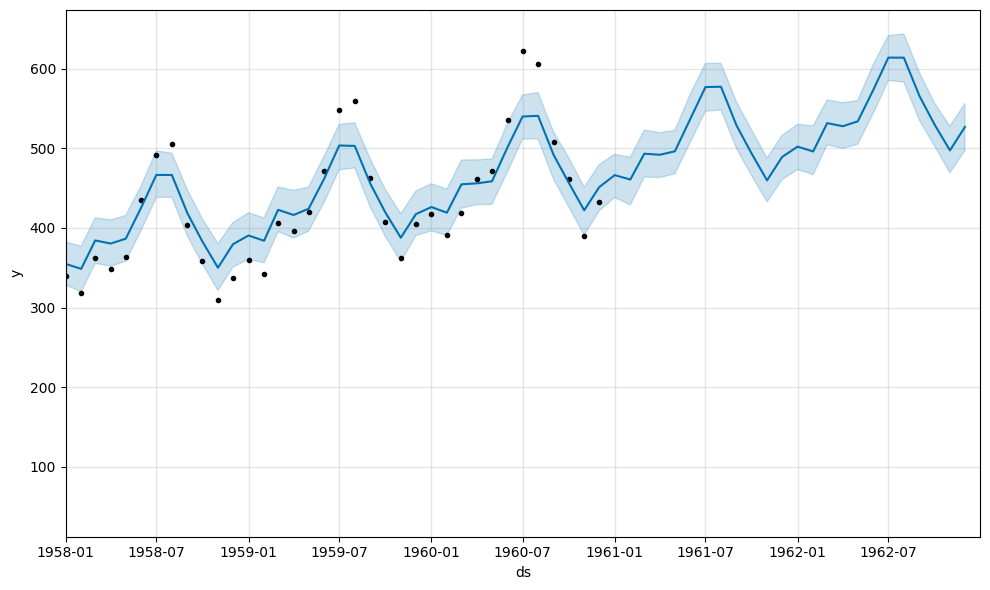

In [52]:
from matplotlib import pyplot as plt

model.plot(forecast);
plt.xlim(pd.Timestamp("1958-01-01"), pd.Timestamp("1962-12-31") )

plotly를 이용한 시각화를 사용하면 특정 범위를 편하게 확대해서 볼 수 있습니다.

In [53]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast)

## Prophet Evaluate

prophet으로 내린 예측 결과가 얼마나 정확한지 확인하는 방법에 대해서 알아보겠습니다.

### 데이터 셋 준비

In [85]:
df = pd.read_csv("./drive/MyDrive/dscamp_2023/restaurant.csv", parse_dates=["date"])
df = df[["date", "total"]]
df = df.rename(columns={"date": "ds", "total": "y"})
df = df.set_index("ds")

In [86]:
df

,y
ds,
2016-01-01,296.0
2016-01-02,191.0
2016-01-03,202.0
2016-01-04,105.0
2016-01-05,98.0
...,...
2017-04-18,91.0
2017-04-19,79.0
2017-04-20,90.0


In [87]:
train_df = df.iloc[:400]
test_df = df.iloc[400:]

### 모델 생성

In [90]:
model = Prophet()
model.fit(train_df.reset_index())

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/6baf9585.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/har3bkbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84785', 'data', 'file=/tmp/tmpxj7s39dg/6baf9585.json', 'init=/tmp/tmpxj7s39dg/har3bkbc.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_modelhvon893b/prophet_model-20230802144555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 인퍼런스

In [92]:
future = model.make_future_dataframe(periods=len(test_df), freq="D")
forecast = model.predict(future)
forecast = forecast.set_index("ds")

In [93]:
forecast

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2016-01-01,144.180688,118.079528,197.046073,144.180688,144.180688,13.677430,13.677430,13.677430,13.677430,13.677430,13.677430,0.0,0.0,0.0,157.858118
2016-01-02,144.099416,198.745632,276.828895,144.099416,144.099416,94.330141,94.330141,94.330141,94.330141,94.330141,94.330141,0.0,0.0,0.0,238.429557
2016-01-03,144.018144,148.390375,231.709618,144.018144,144.018144,47.565860,47.565860,47.565860,47.565860,47.565860,47.565860,0.0,0.0,0.0,191.584004
2016-01-04,143.936871,59.011784,142.968081,143.936871,143.936871,-42.637102,-42.637102,-42.637102,-42.637102,-42.637102,-42.637102,0.0,0.0,0.0,101.299770
2016-01-05,143.855599,62.323909,145.336306,143.855599,143.855599,-40.471668,-40.471668,-40.471668,-40.471668,-40.471668,-40.471668,0.0,0.0,0.0,103.383931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,136.706360,56.494489,138.640381,136.000807,137.407993,-40.471668,-40.471668,-40.471668,-40.471668,-40.471668,-40.471668,0.0,0.0,0.0,96.234693
2017-04-19,136.743835,56.542136,139.251848,136.014302,137.457033,-38.990466,-38.990466,-38.990466,-38.990466,-38.990466,-38.990466,0.0,0.0,0.0,97.753369
2017-04-20,136.781310,61.141654,142.532462,136.037923,137.507689,-33.474196,-33.474196,-33.474196,-33.474196,-33.474196,-33.474196,0.0,0.0,0.0,103.307114


### 결과 시각화 및 메트릭 측정

In [95]:
test_df = test_df.join(forecast["yhat"])

<Axes: xlabel='ds'>

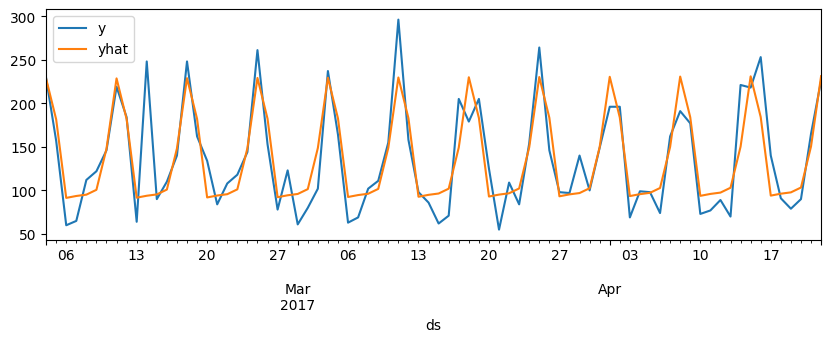

In [96]:
test_df.plot(figsize=(10, 3))

In [99]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_df["y"], test_df["yhat"], squared=False)
print(f"RMSE: {rmse}")

RMSE: 32.07338859534743


### Prophet Cross Validation

train test 셋을 나눠서 RMSE를 측정하는 방법 이외에 Prophet에서 자체적으로 지원하는 Cross Validation 기법도 사용할 수 있습니다.

Cross Validation은 처음에 initial로 설정된 기간만큼의 데이터로 모델을 학습시킵니다. Cutoff는 학습 셋과 테스트 셋을 나누는 지점이 되고, horizon은 얼만큼의 미래를 예측할 지를 의미합니다. 이러한 교차 검증을 initial이 끝나는 시점부터 일정한 간격(period)으로 나눠 진행하는 것이 prophet에서 말하는 교차 검증입니다.

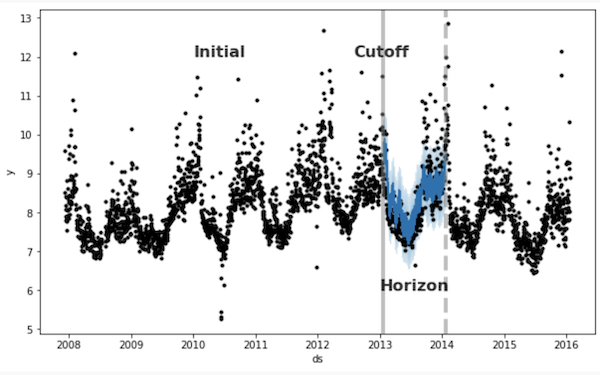

처음 180일치 데이터를 학습하고, 30일 간격으로 향후 30일 미래를 예측하도록 교차 검증을 진행해보겠습니다.

In [103]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [120]:
cv_df = cross_validation(
    model,
    initial="180 days",
    period="30 days",
    horizon="30 days"
)

INFO:prophet:Making 7 forecasts with cutoffs between 2016-07-08 00:00:00 and 2017-01-04 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/515odhoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/n1psz3o9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92016', 'data', 'file=/tmp/tmpxj7s39dg/515odhoj.json', 'init=/tmp/tmpxj7s39dg/n1psz3o9.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_model90ybld4j/prophet_model-20230802151129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/twqg0t_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/446kfzyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [121]:
cv_df

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-09,224.142094,186.360754,267.680232,242.0,2016-07-08
1,2016-07-10,183.181873,141.037635,223.810632,219.0,2016-07-08
2,2016-07-11,80.557570,40.115427,123.335417,84.0,2016-07-08
3,2016-07-12,88.188216,47.175834,130.676276,80.0,2016-07-08
4,2016-07-13,82.782304,41.771857,123.753469,75.0,2016-07-08
...,...,...,...,...,...,...
205,2017-01-30,104.957266,62.915146,146.434597,74.0,2017-01-04
206,2017-01-31,107.719129,66.624877,145.976658,94.0,2017-01-04
207,2017-02-01,109.254607,70.825056,148.789155,81.0,2017-01-04
208,2017-02-02,116.912424,74.813165,156.392748,67.0,2017-01-04


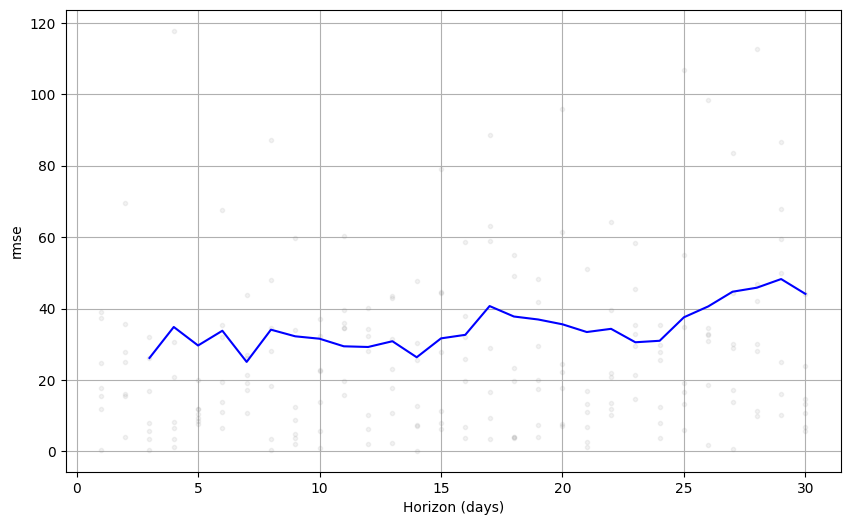

In [125]:
plot_cross_validation_metric(cv_df, metric="rmse");

## Prophet Trend

Prophet이 제공해주는 trend 변화 분석 및 시각화 기능을 사용해보겠습니다.

### 데이터 셋 준비

In [140]:
df = pd.read_csv("./drive/MyDrive/dscamp_2023/TSLA.csv", parse_dates=["Date"])
df = df[["Date", "Close"]]
df = df.rename(columns={"Date": "ds", "Close": "y"})

### 모델 생성

In [141]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/5jy_3iu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/yaflu8ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39025', 'data', 'file=/tmp/tmpxj7s39dg/5jy_3iu7.json', 'init=/tmp/tmpxj7s39dg/yaflu8ae.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_modeln0e_m8gn/prophet_model-20230802152226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 인퍼런스

In [142]:
future = model.make_future_dataframe(periods=12)
forecast = model.predict(future)

### 추세 변환 지점 시각화

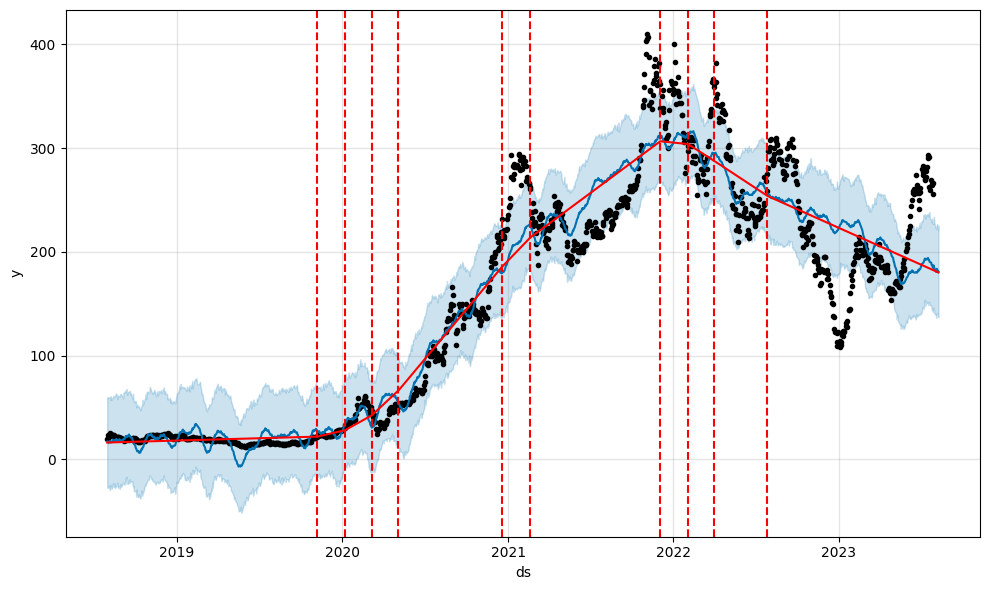

In [144]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
_ = add_changepoints_to_plot(fig.gca(), model, forecast)

## Prophet Seasonality

### 데이터 셋 준비

In [146]:
df = pd.read_csv("./drive/MyDrive/dscamp_2023/AirPassengers.csv", parse_dates=["Month"])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})

### 모델 생성 및 학습

In [147]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/4yjoftnj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/d2q24luk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43222', 'data', 'file=/tmp/tmpxj7s39dg/4yjoftnj.json', 'init=/tmp/tmpxj7s39dg/d2q24luk.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_model4o5914x2/prophet_model-20230802152608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 인퍼런스

In [148]:
future = model.make_future_dataframe(48, freq="MS")
forecast = model.predict(future)

### 결과 시각화

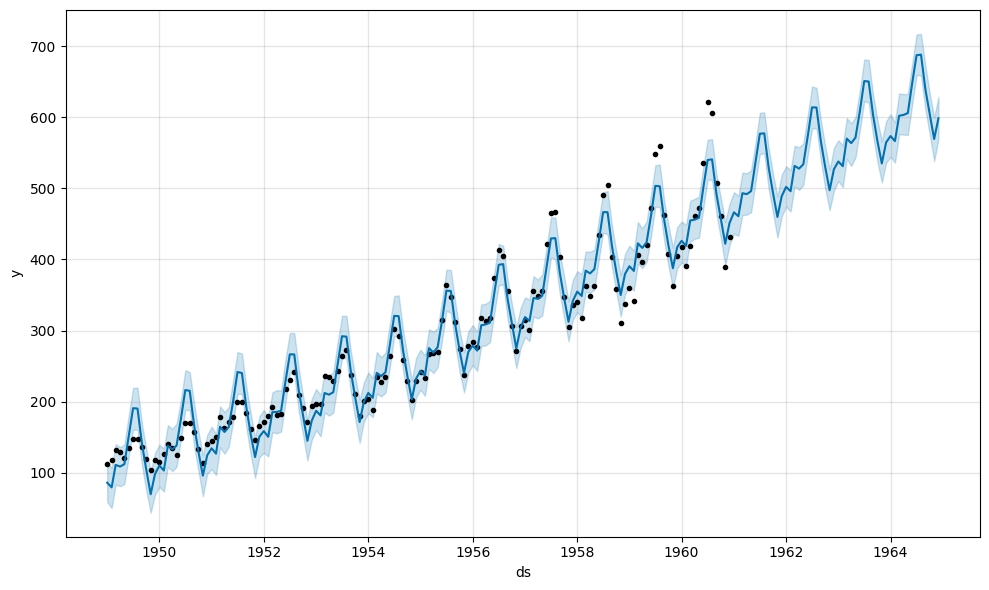

In [150]:
model.plot(forecast);

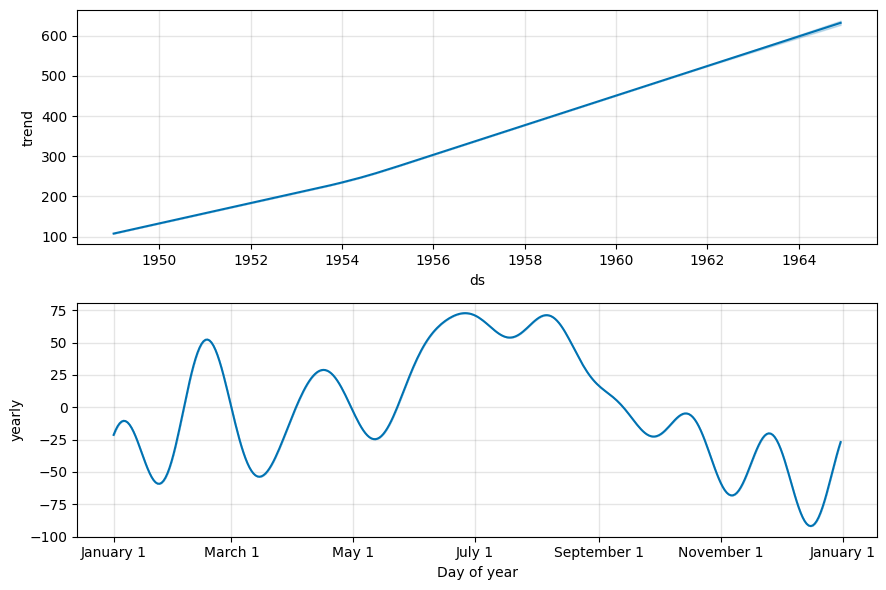

In [153]:
model.plot_components(forecast);

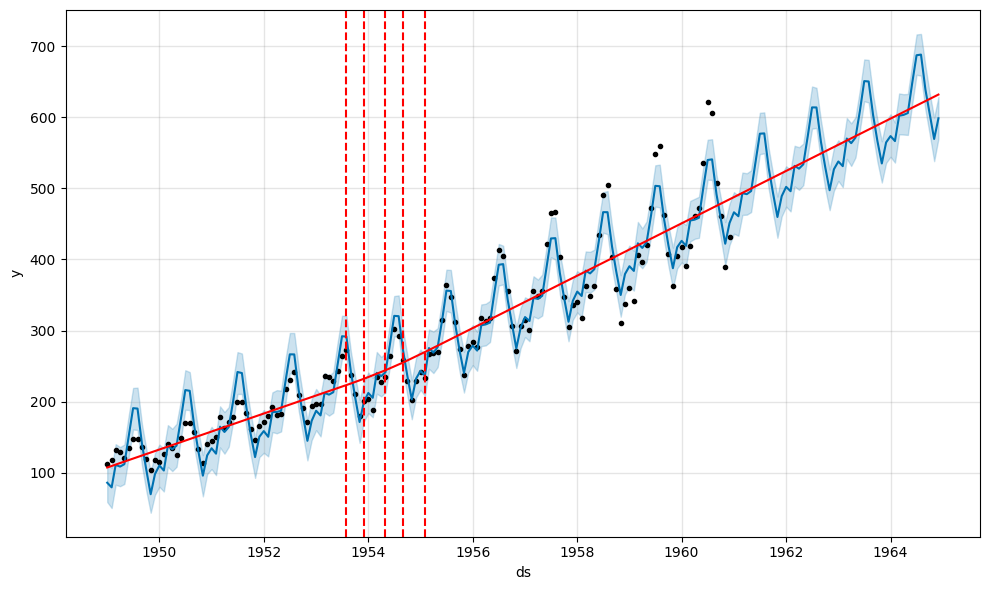

In [154]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
_ = add_changepoints_to_plot(fig.gca(), model, forecast)

### Seasonality를 multiplicative로 지정하여 재학습

In [158]:
model = Prophet(seasonality_mode="multiplicative")
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/wkw8vvtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxj7s39dg/j7awjsd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20044', 'data', 'file=/tmp/tmpxj7s39dg/wkw8vvtl.json', 'init=/tmp/tmpxj7s39dg/j7awjsd4.json', 'output', 'file=/tmp/tmpxj7s39dg/prophet_modelqxadsg6d/prophet_model-20230802153038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [159]:
forecast = model.predict(future)

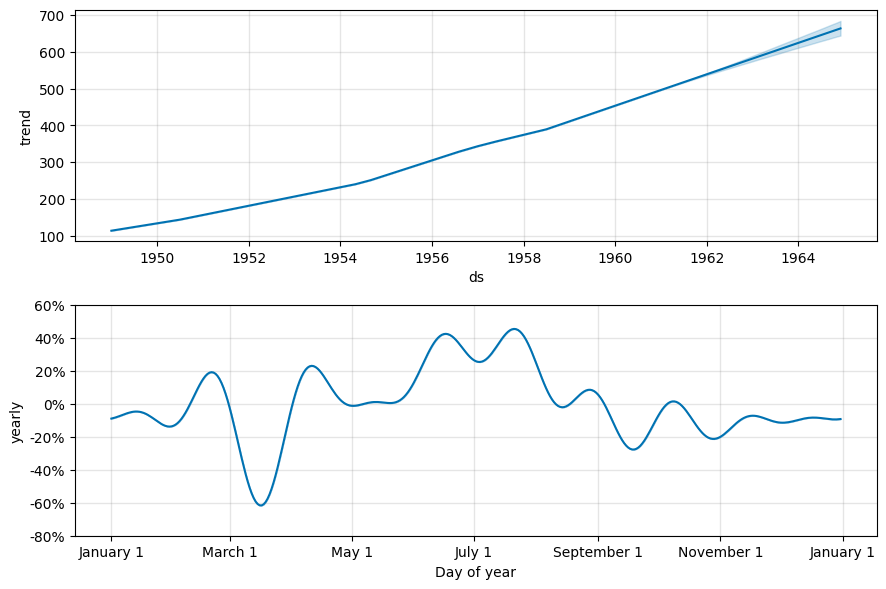

In [161]:
model.plot_components(forecast);

## 정리

이번 챕터에서는 최신 시계열 데이터 분석 라이브러리인 prophet에 대해서 알아보았습니다. prophet은 상당히 방대한 기능이 내장되어 있는 라이브러리로, 실제 현업에서도 활발히 사용되고 있습니다. 기본적인 사용법을 익힌 뒤, 이전에 배웠던 시계열 분석 기본 지식들을 활용하여 주어진 상황에 맞게 활용하면 좋겠습니다.